KHÁM PHÁ DỮ LIỆU

In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import os
import joblib 
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
import time
start = time.time()

In [2]:
# Đọc file CSV sử dụng Pandas
df = pd.read_csv('bodyfat (1).csv')

# Kiểm tra kiểu dữ liệu của các biến trong tập dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


-
Dữ liệu bao gồm 15 biến số, 0 biến phân loại.

In [3]:
# Nhìn qua các biến
df.tail()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [4]:
# Một số thông tin về các cột số
df.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000



**Bảng ở trên cho thấy rằng các biến có các khoảng giá trị khác nhau. Do đó, tốt hơn nên thực hiện bước chuẩn hóa trong quá trình tiền xử lý.**

In [5]:
# Kiểm tra các bản sao trong tập dữ liệu
df.duplicated().sum()

np.int64(0)

**Không có mẫu nào bị trùng lặp trong DataFrame.**

In [6]:
# Kiểm tra các giá trị null
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Không có giá trị bị thiếu trong các biến của tập dữ liệu.

Vẽ biểu đồ mối quan hệ giữa các biến.

Điều này giúp trực quan hóa mối quan hệ giữa cặp biến số (Biến độc lập so với Biến phụ thuộc). Đường màu magenta đại diện cho đường hồi quy phù hợp nhất.

In [7]:
#Plot pair-plots for checking out the dependcy between features
#importlib.reload(matplotlib); importlib.reload(plt); importlib.reload(sns)
#sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.25}})
#plt.tight_layout()
#plt.show()

Như thấy trong hình cặp biểu đồ (pairplot), Mật độ và Tỷ lệ mỡ trong cơ thể có mối quan hệ tuyến tính vì các điểm được dự đoán nằm dọc theo đường hồi quy tốt nhất. Do đó, một mô hình đơn giản (hàm) có thể ánh xạ giá trị của biến độc lập đến giá trị mục tiêu với độ sai số tối thiểu.

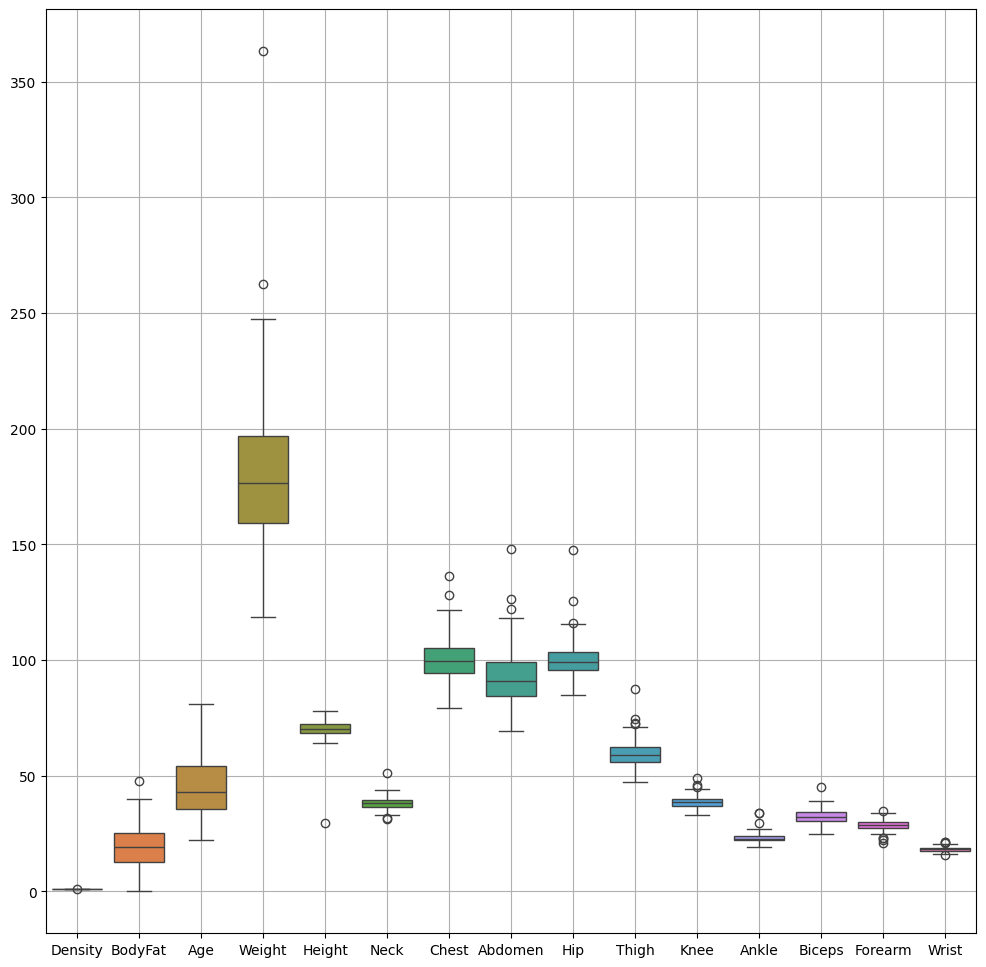

In [8]:
# Kiểm tra các giá trị ngoại lai trong từng biến bằng cách vẽ biểu đồ hộp (box plot).
plt.figure(figsize=(12,12), facecolor='white')
sns.boxplot(data=df)
plt.grid()
plt.show()

Tiền xử lý: Chuyển đổi chiều cao và cân nặng sang đơn vị SI để có cùng hệ thống đơn vị với các đặc trưng khác, trong đó chiều cao được đo bằng cm.

Trực quan hóa mức độ mối quan hệ tuyến tính giữa các biến bằng cách sử dụng biểu đồ nhiệt (heatmap) dựa trên hệ số tương quan Pearson. Các giá trị nằm trong khoảng (-1, 1). Giá trị bằng không có nghĩa là không tồn tại mối tương quan. Khi xem hàng (hoặc cột) Tỷ lệ mỡ trong cơ thể, nó cho thấy nhiều mối tương quan khác nhau giữa Tỷ lệ mỡ và các đặc trưng đầu vào (tức là các biến dự đoán), mối quan hệ mạnh nhất là với biến Mật độ.

Ngoài ra, biểu đồ nhiệt cũng cho thấy sự đa cộng tuyến giữa các biến dự đoán. Điều này có thể khiến đầu ra của mô hình trở nên biến động, thiên lệch hơn và khó giải thích. Điều này sẽ được xem xét trong phần mô hình.

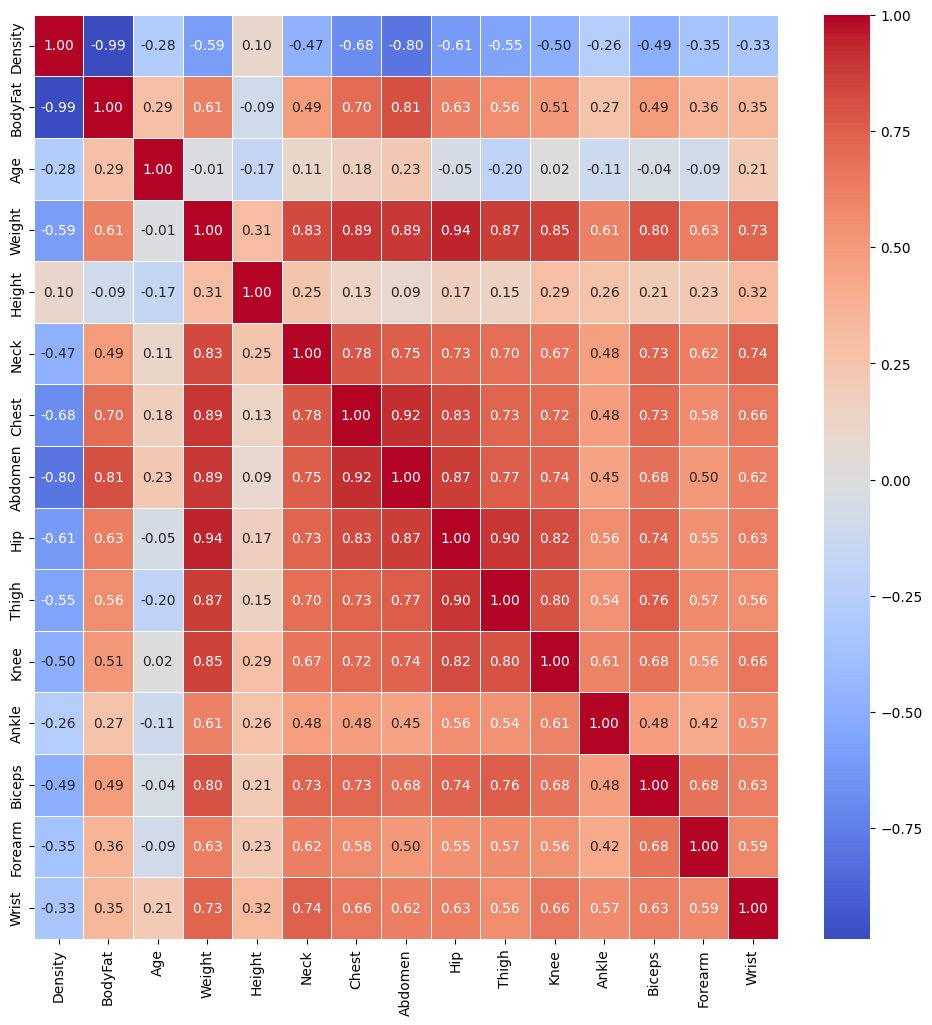

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method ='pearson'),annot=True,linewidth=0.5,fmt="0.2f", cmap = 'coolwarm')
plt.show()

C:\Users\Binh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


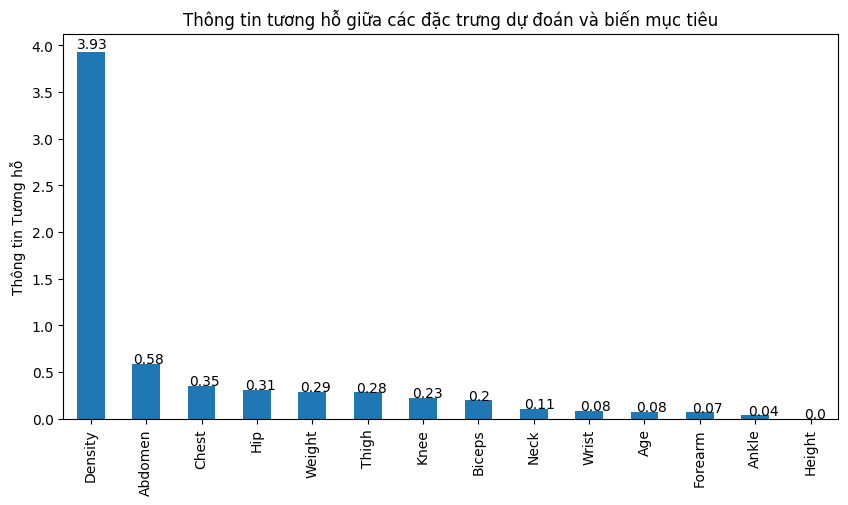

In [10]:
# Kiểm tra điểm Thông tin Tương hỗ (MI) giữa các đặc trưng và biến BodyFat
from sklearn.feature_selection import mutual_info_regression # type: ignore
features = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee','Ankle', 'Biceps', 'Forearm', 'Wrist']
target_var = ['BodyFat']
discrete_vars = [False, True, False, False, False, False, False, False, False, False, False, False, False, False]
mi = mutual_info_regression(df.drop(target_var, axis=1), df.drop(features, axis=1), discrete_features=discrete_vars, random_state=42)
mi = pd.Series(mi)
mi.index = features
ax = mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.ylabel('Thông tin Tương hỗ')
plt.title("Thông tin tương hỗ giữa các đặc trưng dự đoán và biến mục tiêu")
plt.show()


- Thông tin Tương hỗ nắm bắt mức độ mà một biến có thể cung cấp thông tin về biến khác – thường là biến mục tiêu. Hình trên cho thấy rằng Density (Mật độ) có thể cung cấp nhiều thông tin về Body Fat (Tỷ lệ mỡ cơ thể), trong khi Height (Chiều cao) gần như không cho biết gì về Body Fat.

Loại bỏ các giá trị ngoại lai (hai lựa chọn):

Dựa trên giá trị Z-score.
Dựa trên độ lệch chuẩn.
Chọn lựa chọn thứ hai để giữ lại nhiều mẫu hơn vì tập dữ liệu nhỏ.

In [11]:
outlier_samples_list = []

# Duyệt qua các cột trong DataFrame
for col in df.columns:
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1

    # Xác định ngưỡng ngoại lai
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Lưu các hàng có giá trị ngoại lai
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    outlier_samples_list.extend(outliers.values.tolist())

    # Thay thế giá trị ngoại lai bằng ngưỡng giới hạn
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

# Tạo DataFrame từ danh sách các giá trị ngoại lai và xóa các bản ghi trùng lặp
outlier_samples_df = pd.DataFrame(outlier_samples_list, columns=df.columns).drop_duplicates()

# Kết quả
print("Các mẫu chứa ngoại lai:")
print(outlier_samples_df)
print('\n Số lượng mẫu có ngoại lai:', outlier_samples_df.shape[0])

Các mẫu chứa ngoại lai:
    Density  BodyFat   Age  Weight  Height     Neck     Chest  Abdomen  \
0    0.9950  47.5000  51.0  219.00   64.00  41.2000  119.8000   122.10   
1    0.9979  47.5000  51.0  219.00   64.00  41.2000  119.8000   122.10   
2    1.0202  35.2000  46.0  363.15   72.25  51.2000  136.2000   148.10   
3    1.0217  34.5000  45.0  262.75   68.75  43.2000  128.3000   126.20   
4    1.0250  32.9000  44.0  205.00   29.50  36.6000  106.0000   104.30   
5    1.0202  35.2000  46.0  254.00   72.25  51.2000  136.2000   148.10   
6    1.0814   7.7000  39.0  125.25   68.00  31.5000   85.1000    76.00   
7    1.0578  18.0000  43.0  165.50   68.50  31.1000   93.1000    87.30   
8    1.0202  35.2000  46.0  254.00   72.25  43.9625  136.2000   148.10   
9    1.0217  34.5000  45.0  254.00   68.75  43.2000  128.3000   126.20   
10   1.0202  35.2000  46.0  254.00   72.25  43.9625  121.9125   148.10   
11   1.0217  34.5000  45.0  254.00   68.75  43.2000  121.9125   126.20   
12   0.9979  4

In [12]:
df_clean = df[df["BodyFat"] > 2]


In [13]:
# Hiển thị thông tin mô tả của dataset sau khi làm sạch
df_clean.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055201,19.289350,44.944000,178.907200,70.307000,38.000350,100.86770,92.590600,99.836350,59.414000,38.597800,23.053600,32.303650,28.703000,18.234400
std,0.018570,8.191438,12.633101,26.933101,2.647364,2.281767,8.05556,10.170225,6.360306,4.886689,2.296152,1.396009,2.917935,1.945699,0.904305
min,0.997900,3.000000,22.000000,125.000000,62.250000,31.862500,83.40000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,23.250000,15.800000
25%,1.041400,12.600000,36.000000,159.375000,68.312500,36.400000,94.67500,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054800,19.250000,43.500000,176.750000,70.125000,38.000000,99.70000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,1.070050,25.300000,54.000000,197.000000,72.250000,39.475000,105.52500,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,1.099100,44.537500,81.000000,254.000000,77.750000,43.962500,121.91250,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000


Một số giá trị trung bình đã thay đổi đáng kể sau khi làm sạch dữ liệu, chẳng hạn như cân nặng: 178.92 (trước khi làm sạch dữ liệu) và 81.32 (sau khi làm sạch dữ liệu).

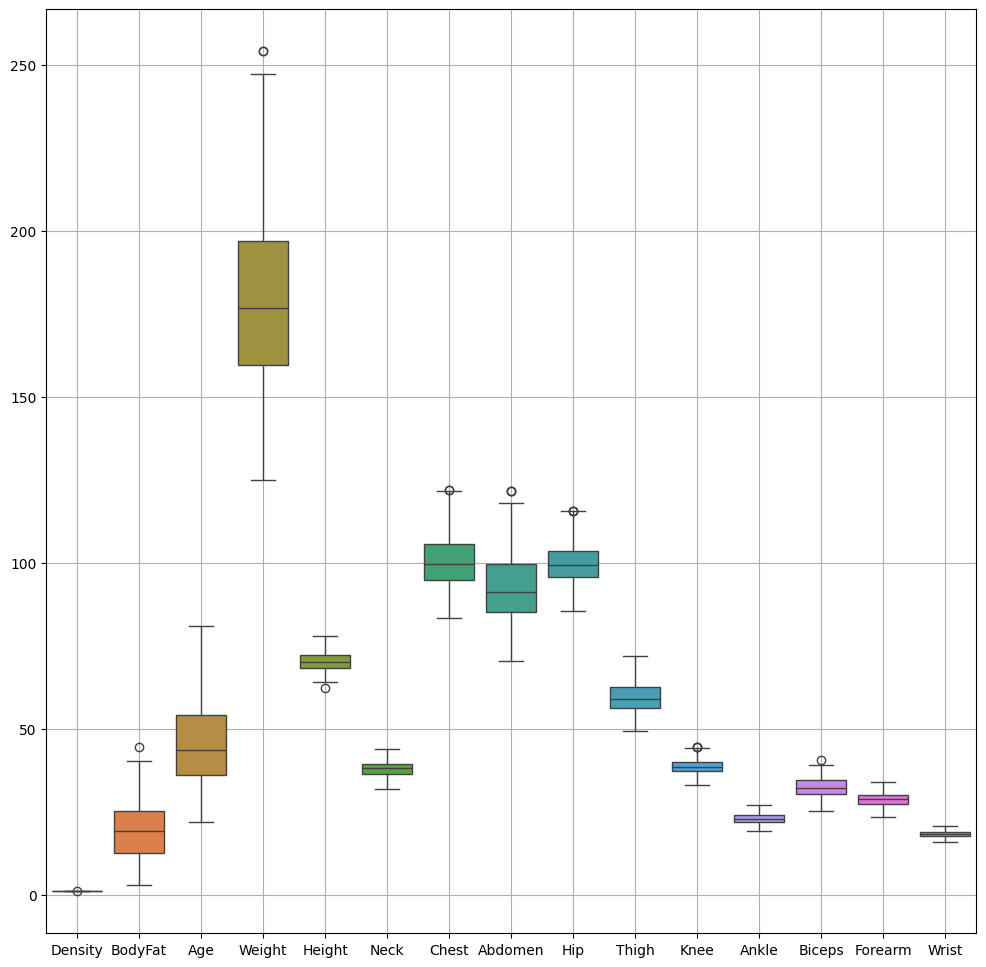

In [14]:
# Kiểm tra các biến sau khi loại bỏ giá trị ngoại lai (sử dụng phương pháp độ lệch chuẩn)
plt.figure(figsize=(12,12), facecolor='white')
sns.boxplot(data=df_clean)
plt.grid()
plt.show()


ML Model

In [15]:
# Loại bỏ biến mục tiêu
X = df_clean.drop(['BodyFat'], axis=1)

# Gán biến mục tiêu (tức là BodyFat) cho Y
Y = df_clean['BodyFat']


In [16]:
# Chuyển đổi Y từ kiểu dữ liệu DataFrame sang mảng
Y = Y.to_numpy().reshape(-1, 1)


Model Hồi Quy Tuyến Tính

In [17]:
X = df_clean.drop(['BodyFat','Age', 'Height', 'Neck', 'Ankle', 'Forearm', 'Wrist'], axis = 1)



In [18]:
# Chia dữ liệu: 60% cho huấn luyện và 40% cho xác thực và kiểm tra
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Chia tiếp 40% thành 20% xác thực và 20% kiểm tra
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Bước 2: Tạo pipeline cho mô hình
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])
# Cross-validation cho tập huấn luyện
cvfolds = KFold(n_splits=4)
scores = cross_validate(pipeline, X_train, Y_train, cv=cvfolds, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)
# Bước 3: Huấn luyện mô hình trên tập huấn luyện
pipeline.fit(X_train, Y_train)
# Tạo thư mục model nếu chưa tồn tại
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)
# Lưu mô hình vào thư mục model
model_path = os.path.join(model_dir, 'linear_model.joblib')
joblib.dump(pipeline, model_path)
# Bước 4: Dự đoán trên tập xác thực và tập kiểm tra
Y_val_pred = pipeline.predict(X_val)
Y_test_pred = pipeline.predict(X_test)
# Bước 5: Tính toán các chỉ số đánh giá
# Tập xác thực
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(Y_val, Y_val_pred)
val_mae = mean_absolute_error(Y_val, Y_val_pred)
# Tập kiểm tra
test_mse_linear = mean_squared_error(Y_test, Y_test_pred)
test_rmse_linear = np.sqrt(test_mse_linear)
test_r2_linear = r2_score(Y_test, Y_test_pred)
test_mae_linear = mean_absolute_error(Y_test, Y_test_pred)

# Bước 6: Tạo bảng đánh giá
evaluation_results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2', 'MAE'],
    'Validation': [val_mse, val_rmse, val_r2, val_mae],
    'Test': [test_mse_linear, test_rmse_linear, test_r2_linear, test_mae_linear]
})

print(evaluation_results)


  Metric  Validation      Test
0    MSE    0.325448  0.886860
1   RMSE    0.570481  0.941732
2     R2    0.994379  0.987294
3    MAE    0.455424  0.642151


In [19]:
print("Linear Regression intercept: ", pipeline['estimator'].intercept_)
print("Linear Regression coefficients: ", pipeline['estimator'].coef_)

Linear Regression intercept:  [19.08133333]
Linear Regression coefficients:  [[-7.41467555 -0.07493629  0.51807843  0.59014968  0.01334533 -0.09866261
   0.10318011 -0.13777201]]


Phương trình của mô hình hồi quy tuyến tính chỉ dựa vào mật độ có thể được biểu diễn như sau:

**BodyFat = -8.1330 x Density + 19.31168**

In [20]:

# Kiểm tra mô hình hồi quy tuyến tính trên dữ liệu kiểm tra (X_test)
pipeline.score(X_test, Y_test)

0.9872935094099395

Model Lasso

tìm best alpha cho mô hình

Giá trị alpha tốt nhất: 0.0031992671377973846


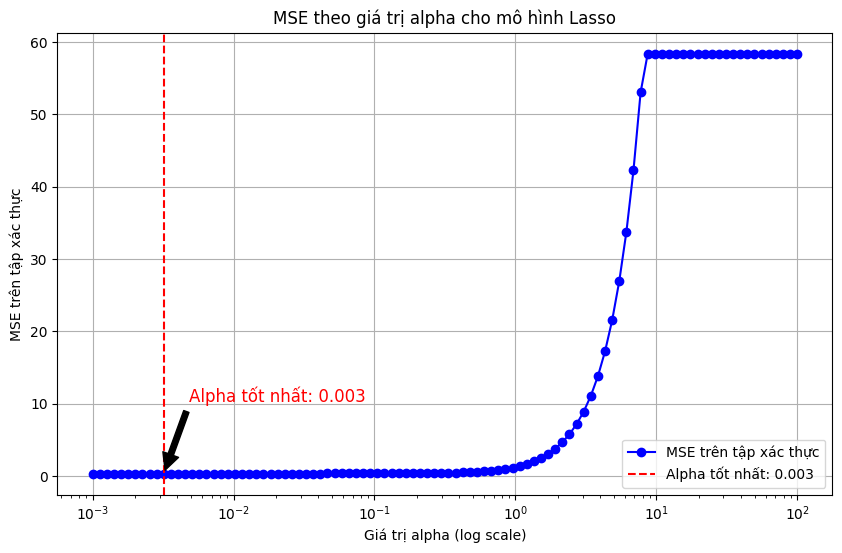

In [21]:
# Danh sách chứa các giá trị alpha và kết quả tương ứng
alphas = np.logspace(-3, 2, 100)  # Giá trị alpha từ 0.001 đến 100
mse_results = []

# Vòng lặp qua các giá trị alpha
for alpha in alphas:
    model = Pipeline([('transformer', StandardScaler()), ('estimator', Lasso(alpha=alpha))])
    model.fit(X_train, Y_train)
    Y_val_pred = model.predict(X_val)
    mse = mean_squared_error(Y_val, Y_val_pred)
    mse_results.append(mse)

# Tìm alpha tốt nhất
best_alpha = alphas[np.argmin(mse_results)]
print(f'Giá trị alpha tốt nhất: {best_alpha}')

# Vẽ biểu đồ MSE theo giá trị alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_results, marker='o', linestyle='-', color='b', label='MSE trên tập xác thực')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Alpha tốt nhất: {best_alpha:.3f}')
plt.xscale('log')
plt.xlabel('Giá trị alpha (log scale)')
plt.ylabel('MSE trên tập xác thực')
plt.title('MSE theo giá trị alpha cho mô hình Lasso')
plt.legend()
plt.grid()

# Thêm chú thích giải thích
plt.annotate(f'Alpha tốt nhất: {best_alpha:.3f}',
             xy=(best_alpha, min(mse_results)),
             xytext=(best_alpha*1.5, min(mse_results) + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             color='red')

plt.show()

In [22]:
# Bước 1: Tạo pipeline cho mô hình Lasso với alpha tốt nhất
pipeline_lasso_best = Pipeline([('transformer', StandardScaler()), ('estimator', Lasso(alpha=best_alpha))])

# Bước 2: Huấn luyện mô hình
pipeline_lasso_best.fit(X_train, Y_train)

# Lưu mô hình vào thư mục model
model_path = os.path.join(model_dir, 'lasso_model.joblib')
joblib.dump(pipeline_lasso_best, model_path)

# Dự đoán trên tập xác thực và tập kiểm tra
Y_val_pred_best = pipeline_lasso_best.predict(X_val)
Y_test_pred_best = pipeline_lasso_best.predict(X_test)

# Tính toán các chỉ số đánh giá cho mô hình Lasso với alpha tốt nhất
val_mse_best = mean_squared_error(Y_val, Y_val_pred_best)
val_rmse_best = np.sqrt(val_mse_best)
val_r2_best = r2_score(Y_val, Y_val_pred_best)
val_mae_best = mean_absolute_error(Y_val, Y_val_pred_best)

test_mse_best_lasso = mean_squared_error(Y_test, Y_test_pred_best)
test_rmse_best_lasso = np.sqrt(test_mse_best_lasso)
test_r2_best_lasso = r2_score(Y_test, Y_test_pred_best)
test_mae_best_lasso = mean_absolute_error(Y_test, Y_test_pred_best)

# Tạo bảng đánh giá cho mô hình Lasso với alpha tốt nhất
evaluation_results_best = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2', 'MAE'],
    'Validation': [val_mse_best, val_rmse_best, val_r2_best, val_mae_best],
    'Test': [test_mse_best_lasso, test_rmse_best_lasso, test_r2_best_lasso, test_mae_best_lasso]
})

print(evaluation_results_best)

# Kết luận
conclusion_best = f"""
Kết luận cho mô hình Lasso với alpha tối ưu:

1. **Giá trị alpha tốt nhất**: {best_alpha}

2. **MSE**: MSE của tập xác thực là {val_mse_best:.2f} trong khi MSE của tập kiểm tra là {test_mse_best_lasso:.2f}.

3. **RMSE**: RMSE của tập xác thực là {val_rmse_best:.2f} và của tập kiểm tra là {test_rmse_best_lasso:.2f}.

4. **R2**: Đối với R², giá trị của tập xác thực là {val_r2_best:.2f} trong khi giá trị trên tập kiểm tra là {test_r2_best_lasso:.2f}.

5. **MAE**: MAE của tập xác thực là {val_mae_best:.2f} và của tập kiểm tra là {test_mae_best_lasso:.2f}.

Tóm lại, mô hình Lasso với alpha tối ưu đã cung cấp hiệu suất tốt trên cả tập xác thực và tập kiểm tra.
"""

print(conclusion_best)


  Metric  Validation      Test
0    MSE    0.321596  0.878847
1   RMSE    0.567095  0.937469
2     R2    0.994445  0.987408
3    MAE    0.452755  0.636245

Kết luận cho mô hình Lasso với alpha tối ưu:

1. **Giá trị alpha tốt nhất**: 0.0031992671377973846

2. **MSE**: MSE của tập xác thực là 0.32 trong khi MSE của tập kiểm tra là 0.88.

3. **RMSE**: RMSE của tập xác thực là 0.57 và của tập kiểm tra là 0.94.

4. **R2**: Đối với R², giá trị của tập xác thực là 0.99 trong khi giá trị trên tập kiểm tra là 0.99.

5. **MAE**: MAE của tập xác thực là 0.45 và của tập kiểm tra là 0.64.

Tóm lại, mô hình Lasso với alpha tối ưu đã cung cấp hiệu suất tốt trên cả tập xác thực và tập kiểm tra.



Mô hình MLP
- tìm ra best

C:\Users\Binh\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Binh\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


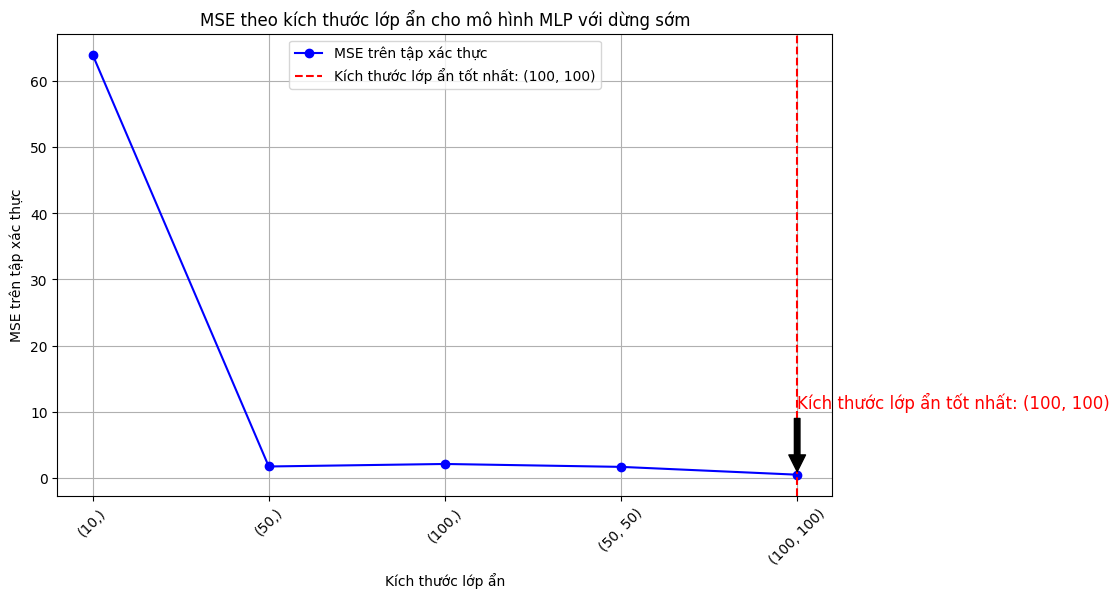

Kích thước lớp ẩn tốt nhất: (100, 100)


In [23]:
# Danh sách chứa các giá trị alpha và kết quả tương ứng
hidden_layer_sizes = [(10,), (50,), (100,), (50, 50), (100, 100)]
mse_results = []

# Vòng lặp qua các giá trị hidden_layer_sizes
for layer_size in hidden_layer_sizes:
    model = Pipeline([('transformer', StandardScaler()),
                      ('estimator', MLPRegressor(hidden_layer_sizes=layer_size,
                                                  max_iter=1000,
                                                  random_state=42,
                                                  early_stopping=True,
                                                  validation_fraction=0.1,
                                                  n_iter_no_change=10))])  # Dừng sớm
    model.fit(X_train, Y_train.ravel())
    Y_val_pred = model.predict(X_val)
    mse = mean_squared_error(Y_val, Y_val_pred)
    mse_results.append(mse)

# Chuyển đổi hidden_layer_sizes thành chuỗi cho dễ đọc trên trục x
hidden_layer_sizes_str = [str(size) for size in hidden_layer_sizes]

# Vẽ biểu đồ MSE theo kích thước lớp ẩn
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_str, mse_results, marker='o', linestyle='-', color='b', label='MSE trên tập xác thực')
plt.xlabel('Kích thước lớp ẩn')
plt.ylabel('MSE trên tập xác thực')
plt.title('MSE theo kích thước lớp ẩn cho mô hình MLP với dừng sớm')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Tìm kích thước lớp ẩn tốt nhất
best_layer_size = hidden_layer_sizes[np.argmin(mse_results)]
plt.axvline(x=str(best_layer_size), color='r', linestyle='--', label=f'Kích thước lớp ẩn tốt nhất: {best_layer_size}')
plt.legend()
plt.annotate(f'Kích thước lớp ẩn tốt nhất: {best_layer_size}',
             xy=(str(best_layer_size), min(mse_results)),
             xytext=(str(best_layer_size), min(mse_results) + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             color='red')

plt.show()

print(f'Kích thước lớp ẩn tốt nhất: {best_layer_size}')

In [24]:
# Triển khai mô hình MLP với kích thước lớp ẩn tốt nhất
final_model = Pipeline([
    ('transformer', StandardScaler()),
    ('estimator', MLPRegressor(hidden_layer_sizes=best_layer_size,
                                max_iter=1000,
                                random_state=42,
                                early_stopping=True,
                                validation_fraction=0.1,
                                n_iter_no_change=10))  # Dừng sớm
])
final_model.fit(X_train, Y_train.ravel())

# Dự đoán trên tập kiểm tra
Y_test_pred = final_model.predict(X_test)

# Tính toán MSE, R2, RMSE và MAE cho tập kiểm tra
mse_test_mlp = mean_squared_error(Y_test, Y_test_pred)
rmse_test_mlp = np.sqrt(mse_test_mlp)
r2_test_mlp = final_model.score(X_test, Y_test)
mae_test_mlp = np.mean(np.abs(Y_test - Y_test_pred))

# Tính toán MSE, R2, RMSE và MAE cho tập xác thực
Y_val_pred = final_model.predict(X_val)
mse_val = mean_squared_error(Y_val, Y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = final_model.score(X_val, Y_val)
mae_val = np.mean(np.abs(Y_val - Y_val_pred))

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R²', 'MAE'],
    'Validation Set': [mse_val, rmse_val, r2_val, mae_val],
    'Test Set': [mse_test_mlp, rmse_test_mlp, r2_test_mlp, mae_test_mlp]
})

print(comparison_df)

# Hiển thị kết quả trên tập kiểm tra
print(f'Kết quả trên tập kiểm tra:')
print(f'MSE: {mse_test_mlp:.3f}')
print(f'RMSE: {rmse_test_mlp:.3f}')
print(f'R2: {r2_test_mlp:.3f}')
print(f'MAE: {mae_test_mlp:.3f}')

# Kết luận
if mse_val < mse_test_mlp:
    conclusion = "Mô hình hoạt động tốt hơn trên tập xác thực so với tập kiểm tra, cho thấy có thể có hiện tượng overfitting."
else:
    conclusion = "Mô hình có thể tổng quát tốt trên cả tập xác thực và tập kiểm tra, với các chỉ số tương đối gần nhau."

print("\nKết luận:")
print(conclusion)
# Lưu mô hình vào thư mục model
model_path = os.path.join(model_dir, 'mlp_model.joblib')
joblib.dump(final_model, model_path)


  Metric  Validation Set  Test Set
0    MSE        0.458523  1.358489
1   RMSE        0.677143  1.165542
2     R²        0.992080  0.980536
3    MAE        8.524830  9.349509
Kết quả trên tập kiểm tra:
MSE: 1.358
RMSE: 1.166
R2: 0.981
MAE: 9.350

Kết luận:
Mô hình hoạt động tốt hơn trên tập xác thực so với tập kiểm tra, cho thấy có thể có hiện tượng overfitting.


['model\\mlp_model.joblib']

Mô hình kết hợp (Stacking)

In [25]:
# Đảm bảo bạn đã huấn luyện các mô hình này và lưu trữ chúng trong biến
# Định nghĩa mô hình Linear Regression
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Định nghĩa mô hình Lasso
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=best_alpha))  # Sử dụng alpha tốt nhất đã tìm được
])

# Định nghĩa mô hình MLP
mlp_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(hidden_layer_sizes=best_layer_size,
                                max_iter=1000,
                                random_state=42,
                                early_stopping=True,
                                validation_fraction=0.1,
                                n_iter_no_change=10))
])

# Tạo mô hình Stacking
stacking_model = StackingRegressor(
    estimators=[
        ('linear', linear_model),
        ('lasso', lasso_model),
        ('mlp', mlp_model)
    ],
    final_estimator=LinearRegression()  # Bạn có thể thay đổi final_estimator nếu muốn
)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, Y_train.ravel())

# Dự đoán trên tập kiểm tra
Y_test_pred = stacking_model.predict(X_test)

# Tính toán các chỉ số cho tập kiểm tra
mse_test_staking = mean_squared_error(Y_test, Y_test_pred)
rmse_test_staking = np.sqrt(mse_test_staking)
r2_test_staking = r2_score(Y_test, Y_test_pred)
mae_test_staking = mean_absolute_error(Y_test, Y_test_pred)

# Hiển thị kết quả
print("Kết quả trên tập xác thực:")
print(f'MSE: {mse_val:.3f}')
print(f'RMSE: {rmse_val:.3f}')
print(f'R2: {r2_val:.3f}')
print(f'MAE: {mae_val:.3f}')

print("\nKết quả trên tập kiểm tra:")
print(f'MSE: {mse_test_staking:.3f}')
print(f'RMSE: {rmse_test_staking:.3f}')
print(f'R2: {r2_test_staking:.3f}')
print(f'MAE: {mae_test_staking:.3f}')

model_path = os.path.join(model_dir, 'stacking_model.joblib')
joblib.dump(stacking_model, model_path)

Kết quả trên tập xác thực:
MSE: 0.459
RMSE: 0.677
R2: 0.992
MAE: 8.525

Kết quả trên tập kiểm tra:
MSE: 1.230
RMSE: 1.109
R2: 0.982
MAE: 0.742


['model\\stacking_model.joblib']